In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tweepy
from tweepy import OAuthHandler

In [2]:
consumer_key = ""
consumer_secret = ""
access_token = ""
access_token_secret = ""



# Use the above credentials to authenticate the API.

auth = tweepy.OAuthHandler( consumer_key , consumer_secret )
auth.set_access_token( access_token , access_token_secret )
api = tweepy.API(auth)

In [3]:
df = pd.DataFrame(columns=["Date","User","IsVerified","Tweet","Likes","RT",'User_location'])
print(df)

Empty DataFrame
Columns: [Date, User, IsVerified, Tweet, Likes, RT, User_location]
Index: []


In [4]:
def get_tweets(Topic,Count):    
    i=0
    for tweet in tweepy.Cursor(api.search, q=Topic,count=100, lang="en",exclude='retweets').items():
        print(i, end='\r')
        df.loc[i,"Date"] = tweet.created_at
        df.loc[i,"User"] = tweet.user.name
        df.loc[i,"IsVerified"] = tweet.user.verified
        df.loc[i,"Tweet"] = tweet.text
        df.loc[i,"Likes"] = tweet.favorite_count
        df.loc[i,"RT"] = tweet.retweet_count
        df.loc[i,"User_location"] = tweet.user.location
        #df.to_csv("TweetDataset.csv",index=False)
        df.to_excel('{}.xlsx'.format("TweetDataset"),index=False)   ## Save as Excel
        i=i+1
        if i>Count:
            break
        else:
            pass

In [5]:
Topic=["Ronaldo"]
get_tweets(Topic , Count=50)

In [6]:
df.head(8)

,Date,User,IsVerified,Tweet,Likes,RT,User_location
0,2021-10-10 09:46:07,A.,False,What is Ronaldo doing there 😂😂😂 https://t.co/g...,0,0,This God Forsaken Country
1,2021-10-10 09:45:59,CristianoXtra,False,Portugal have scored 23 goals in their last 4 ...,1,0,Portugal
2,2021-10-10 09:45:57,Đåvïđø,False,@Utddd_ @fcsalah11 @_rashfordfc Yeah it's not ...,0,0,
3,2021-10-10 09:45:55,Brainstormer,False,@Tom_LUnited @letsstopthespin @UTDClara United...,0,0,London UK
4,2021-10-10 09:45:52,Tom Babington,False,@SebastianSonea @aRiFuL47 @SkySportsPL Can you...,0,0,
5,2021-10-10 09:45:45,'deyjie,False,@Dee11Fibre @Mpisaneh10 @Mysticalleo_ @mmoaNko...,0,0,"Lagos, Nigeria"
6,2021-10-10 09:45:29,PetrCzech🇵🇹,False,@yeahduh0 Ronaldo owns Pessidogs and their ido...,1,0,"Eibar, España"
7,2021-10-10 09:45:25,おならクサスギアーノこうへい#f4f🇯🇵🇧🇷FartMakesMeBetter🏁,False,@vintage_cr7 @FCBayernEN my Ronaldo https://t....,0,0,下水道(InYourFart)


In [7]:
# Function to Clean the Tweet.

import re
def clean_tweet(tweet):
    return ' '.join(re.sub('(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|([RT])', ' ', str(tweet).lower()).split())

# We only want the Text so :

# (@[A-Za-z0-9]+)   : Delete Anything like @hello @Letsupgrade etc
# ([^0-9A-Za-z \t]) : Delete everything other than text,number,space,tabspace
# (\w+:\/\/\S+)     : Delete https://
# ([RT]) : Remove "RT" from the tweet

In [8]:
# Funciton to analyze Sentiment

from textblob import TextBlob
def analyze_sentiment(tweet):
    analysis = TextBlob(tweet)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

In [9]:
#Function to Pre-process data for Worlcloud:here we are removing the words present in Topic from the Corpus so they dont come in WordCloud.
# Ex : Topic is "Arsenal vs United", we want to remove "Arsenal" "vs" "United" from the WordCloud.

def prepCloud(Topic_text,Topic):
    Topic = str(Topic).lower()
    Topic=' '.join(re.sub('([^0-9A-Za-z \t])', ' ', Topic).split())
    Topic = re.split("\s+",str(Topic))
    stopwords = set(STOPWORDS)
    stopwords.update(Topic) ### Add our topic in Stopwords, so it doesnt appear in wordClous
    ###
    text_new = " ".join([txt for txt in Topic_text.split() if txt not in stopwords])

In [10]:
df['clean_tweet'] = df['Tweet'].apply(lambda x : clean_tweet(x))
df.head(5)

,Date,User,IsVerified,Tweet,Likes,RT,User_location,clean_tweet
0,2021-10-10 09:46:07,A.,False,What is Ronaldo doing there 😂😂😂 https://t.co/g...,0,0,This God Forsaken Country,what is ronaldo doing there
1,2021-10-10 09:45:59,CristianoXtra,False,Portugal have scored 23 goals in their last 4 ...,1,0,Portugal,portugal have scored 23 goals in their last 4 ...
2,2021-10-10 09:45:57,Đåvïđø,False,@Utddd_ @fcsalah11 @_rashfordfc Yeah it's not ...,0,0,,rashfordfc yeah it s not like ronaldo carried ...
3,2021-10-10 09:45:55,Brainstormer,False,@Tom_LUnited @letsstopthespin @UTDClara United...,0,0,London UK,lunited united did not buy sancho to play on t...
4,2021-10-10 09:45:52,Tom Babington,False,@SebastianSonea @aRiFuL47 @SkySportsPL Can you...,0,0,,can you point to where iniesta or lampard had ...


In [11]:
# Call function to get the Sentiments

df["Sentiment"] = df["Tweet"].apply(lambda x : analyze_sentiment(x))
df.head(5)

,Date,User,IsVerified,Tweet,Likes,RT,User_location,clean_tweet,Sentiment
0,2021-10-10 09:46:07,A.,False,What is Ronaldo doing there 😂😂😂 https://t.co/g...,0,0,This God Forsaken Country,what is ronaldo doing there,Neutral
1,2021-10-10 09:45:59,CristianoXtra,False,Portugal have scored 23 goals in their last 4 ...,1,0,Portugal,portugal have scored 23 goals in their last 4 ...,Neutral
2,2021-10-10 09:45:57,Đåvïđø,False,@Utddd_ @fcsalah11 @_rashfordfc Yeah it's not ...,0,0,,rashfordfc yeah it s not like ronaldo carried ...,Negative
3,2021-10-10 09:45:55,Brainstormer,False,@Tom_LUnited @letsstopthespin @UTDClara United...,0,0,London UK,lunited united did not buy sancho to play on t...,Neutral
4,2021-10-10 09:45:52,Tom Babington,False,@SebastianSonea @aRiFuL47 @SkySportsPL Can you...,0,0,,can you point to where iniesta or lampard had ...,Positive


In [12]:
# Check Summary of Random Record
n = 15
print("Original tweet:\n",df['Tweet'][n])
print()
print("Clean tweet:\n",df['clean_tweet'][n])
print()
print("Sentiment of the tweet:\n",df['Sentiment'][n])

Original tweet:
 @_Lotanna They were great for their era ngl, but football has evolved by a lot. The level of domination Messi and R… https://t.co/kOcXn23nAL

Clean tweet:
 lotanna they were great for their era ngl but football has evolved by a lot the level of domination messi and r

Sentiment of the tweet:
 Positive


In [13]:
# Overall Summary

print("Total Tweets Extracted for Topic : {} are : {}".format(Topic,len(df.Tweet)))
print("Total Positive Tweets are : {}".format(len(df[df["Sentiment"]=="Positive"])))
print("Total Negative Tweets are : {}".format(len(df[df["Sentiment"]=="Negative"])))
print("Total Neutral Tweets are : {}".format(len(df[df["Sentiment"]=="Neutral"])))

Total Tweets Extracted for Topic : ['Ronaldo'] are : 51
Total Positive Tweets are : 20
Total Negative Tweets are : 8
Total Neutral Tweets are : 23


In [14]:

df["Sentiment"].value_counts()

Neutral     23
Positive    20
Negative     8
Name: Sentiment, dtype: int64

Text(0.5, 1.0, 'Summary of Counts for Total tweets')

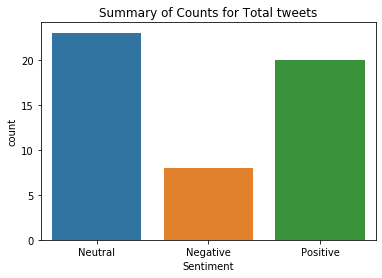

In [15]:
#sns.countplot(df["Sentiment"],facecolor=(0, 0, 0, 0),linewidth=5,edgecolor=sns.color_palette("dark", 3))
sns.countplot(df["Sentiment"])
plt.title("Summary of Counts for Total tweets")


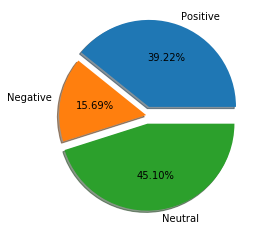

In [16]:

# Piechart 
#string, used to label the wedges with their numeric value. The label will be placed inside the wedge. The format string will be fmt%pct.

a=len(df[df["Sentiment"]=="Positive"])
b=len(df[df["Sentiment"]=="Negative"])
c=len(df[df["Sentiment"]=="Neutral"])
d=np.array([a,b,c])
explode = (0.1, 0.0, 0.1)
plt.pie(d,shadow=True,explode=explode,labels=["Positive","Negative","Neutral"],autopct='%1.2f%%');

Text(0.5, 1.0, 'Summary of Counts for Total tweets,Distributed by if the User has a verified Account or not')

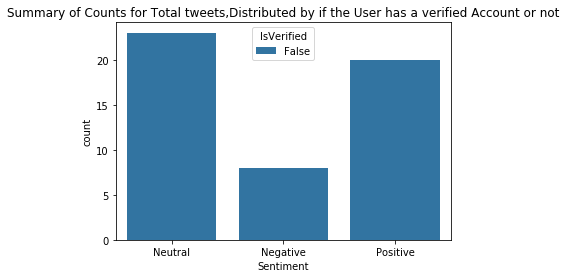

In [17]:
sns.countplot(df["Sentiment"],hue=df.IsVerified)
plt.title("Summary of Counts for Total tweets,Distributed by if the User has a verified Account or not")

In [18]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [22]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

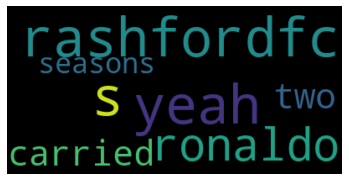

In [19]:
# Start with one review:

text = df.clean_tweet[2]

# Create and generate a word cloud image:
wordcloud = WordCloud(max_words=10).generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

There are 3718 words in the combination of all review.


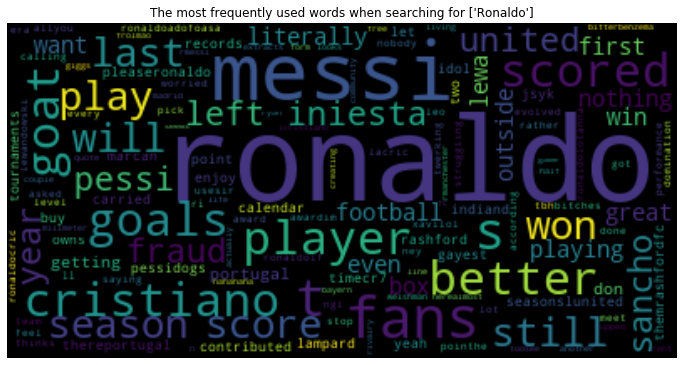

In [23]:
# Combine all reviews into one big text and create a Cloud to see which Words are most common in these Tweets.

text = "".join(review for review in df.clean_tweet)
print ("There are {} words in the combination of all review.".format(len(text)))


# Create stopword list:
stopwords = set(STOPWORDS)
#stopwords.update(["drink", "now", "wine", "flavor", "flavors"])  #To add any custom StopWords

text_newALL = prepCloud(text,Topic)


# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords,max_words=800,max_font_size=70).generate(text)

# Display the generated image:
# the matplotlib way:


plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("The most frequently used words when searching for {}".format(Topic),)
plt.axis("off")
plt.show()

There are 3718 words in the combination of all review.


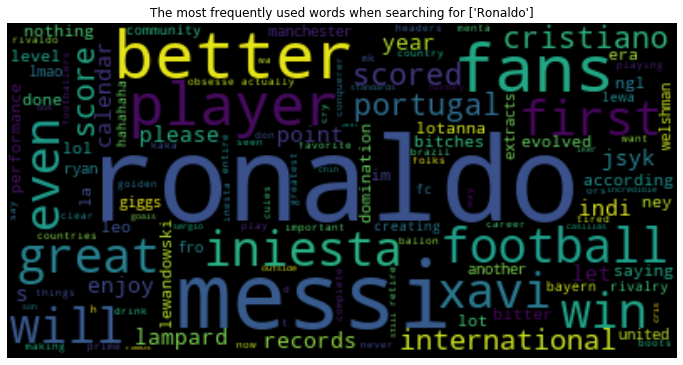

In [25]:
# Combine POSITIVE reviews into one big text and create a Cloud to see which Words are most common in these Tweets.

text_positive = " ".join(review for review in df[df["Sentiment"]=="Positive"].clean_tweet)
print ("There are {} words in the combination of all review.".format(len(text)))


# Create stopword list:
stopwords = set(STOPWORDS)
#stopwords.update(["and", "now", "wine", "flavor", "flavors"])  #To add any custom StopWords
#text_positive=" ".join([word for word in text_positive.split() if word not in stopwords])

text_new_positive = prepCloud(text_positive,Topic)

#stopwords.update(["drink", "now", "wine", "flavor", "flavors"])  #To add any custom StopWords

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords,max_words=800,max_font_size=70).generate(text_positive)

# Display the generated image:
# the matplotlib way:


plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("The most frequently used words when searching for {}".format(Topic))
plt.axis("off")
plt.show()

There are 3718 words in the combination of all review.


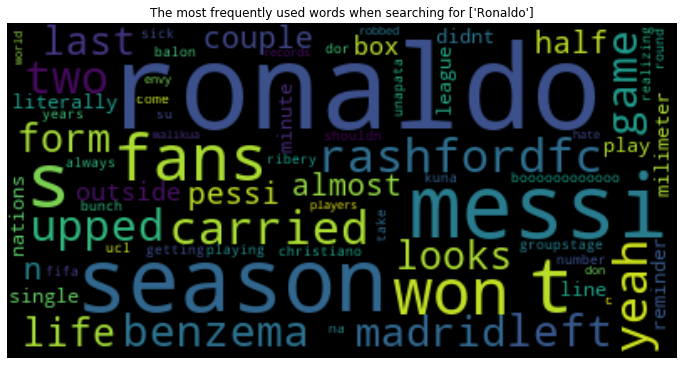

In [26]:
# Combine Negative reviews into one big text and create a Cloud to see which Words are most common in these Tweets.

text_negative = " ".join(review for review in df[df["Sentiment"]=="Negative"].clean_tweet)
print ("There are {} words in the combination of all review.".format(len(text)))


# Create stopword list:
stopwords = set(STOPWORDS)
#stopwords.update(["and", "now", "wine", "flavor", "flavors"])  #To add any custom StopWords

#text_negative=" ".join([word for word in text_negative.split() if word not in stopwords])
text_new_negative = prepCloud(text_negative,Topic)

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords,max_words=800,max_font_size=70).generate(text_negative)

# Display the generated image:
# the matplotlib way:


plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("The most frequently used words when searching for {}".format(Topic))
plt.axis("off")
plt.show()